## support vector machine
SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane that best divides the dataset into classes.
# Support Vectors
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.
# Hyperplane
A hyperplane is a decision plane which separates between a set of objects having different class memberships.
# Margin
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

# SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

In [1]:


import pandas as pd
import numpy as np

from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets

import matplotlib.pyplot as plt



##   Breast Cancer Wisconsin (Diagnostic) Data Set
	

In [2]:
CancerData=datasets.load_breast_cancer()

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [25]:
print("Shape: ",CancerData.data.shape)
print("Labels: ",CancerData.target_names)
print("Features: ",CancerData.feature_names)

Shape:  (569, 30)
Labels:  ['malignant' 'benign']
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
CancerDF=pd.DataFrame(CancerData.data,columns=CancerData.feature_names)
CancerDF['target']=pd.Series(CancerData.target)#(0:malignant, 1:benign)
CancerDF.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
X=CancerDF.iloc[:,0:-1]
Y=CancerDF.iloc[:,-1]

In [14]:
###Definin python function as kernel
###Linear kernel
def my_kernel(X, Y):
    return np.dot(X, Y.T)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)
SVM1=SVC(kernel=my_kernel)
SVM1.fit(X_train,y_train)
y_pred=SVM1.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


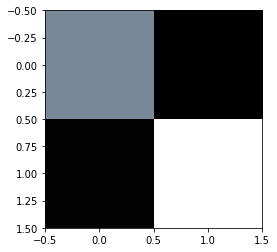

In [23]:
confusion_matrix(y_pred,y_test)
plt.imshow(confusion_matrix(y_pred,y_test),cmap='bone')

#  Haberman's Survival Data Set 

https://archive.ics.uci.edu/ml/datasets/haberman%27s+survival

In [28]:
SurvivalDF = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None)
print('Shape:',SurvivalDF.shape)

Shape: (306, 4)


In [34]:
X = SurvivalDF.iloc[:,0:3]
y = SurvivalDF.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
model1 = SVC(C=1.1,
             degree=2,
             kernel='poly',
             max_iter=125000,
             tol=1e-4)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
confusion_matrix(y_pred,y_test)


Accuracy: 0.7326732673267327


array([[74, 27],
       [ 0,  0]])

## C:float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
## kernel:{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
https://scikit-learn.org/stable/modules/svm.html#svm-kernels

## max_iter:int, default=-1
Hard limit on iterations within solver, or -1 for no limit.


# Pima indians diabetes data

In [35]:
###https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.data.csv
diabetesDF = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv',header=None)
X=diabetesDF.iloc[:,0:-1]
Y=diabetesDF.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
dia = SVC(C=12.0,
          kernel='rbf',
          max_iter=1000)
dia.fit(X_train,y_train)
y_pred=dia.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
confusion_matrix(y_pred,y_test)


Accuracy: 0.7395833333333334


array([[99, 26],
       [24, 43]])

# Abalone Data


In [36]:
#https://archive.ics.uci.edu/ml/datasets/abalone
abaloneDF = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None)
X = abaloneDF.iloc[:,1:-1]
y = abaloneDF.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)


## Linear Support Vector Classification
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.


Accuracy: 0.2625090645395214


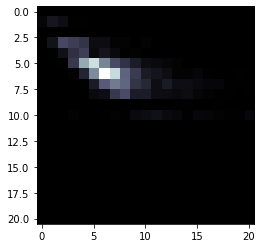

In [38]:
abo= LinearSVC(multi_class='ovr',max_iter=3500)
abo.fit(X_train,y_train)
y_pred=abo.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
#confusion_matrix(y_pred,y_test)
plt.imshow(confusion_matrix(y_pred,y_test),cmap='bone')

## multi_class:{‘ovr’, ‘crammer_singer’}, default=’ovr’
Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored

# Iris Data

In [40]:
#https://archive.ics.uci.edu/ml/datasets/Iris
Iris = datasets.load_iris()
X = Iris['data']
y = Iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Irism= LinearSVC(multi_class='ovr',max_iter=3500)
Irism.fit(X_train,y_train)
y_pred=Irism.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
confusion_matrix(y_pred,y_test)




Accuracy: 1.0


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])